<a href="https://colab.research.google.com/github/RomanKunal/Deep-Learning/blob/main/PySpark_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark matplotlib pandas

In [4]:
#setp 1 import the necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, sum
import matplotlib.pyplot as plt
import pandas as pd

# Step 2: Initialize a Spark session
spark = SparkSession.builder.appName("Titanic Data Analysis").getOrCreate()

# Read the Titanic dataset from CSV
titanic = spark.read.csv("/content/taitanic.csv", header=True, inferSchema=True)  # Use the correct method and check the file path

# Show the first 5 rows of the dataframe
titanic.show(5)



+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

In [5]:
#step 4 basic data exploration
titanic.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [6]:
titanic.describe().show()

+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|summary|      PassengerId|           Survived|            Pclass|                Name|   Sex|               Age|             SibSp|              Parch|            Ticket|             Fare|Cabin|Embarked|
+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|  count|              891|                891|               891|                 891|   891|               714|               891|                891|               891|              891|  204|     889|
|   mean|            446.0| 0.3838383838383838| 2.308641975308642|                NULL|  NULL| 29.69911764705882|0.5230078563411896|0.38159371492704824|260318.54916792738| 32.20420

In [9]:
#count missing values for each column
from pyspark.sql import functions as F

# Count the missing values for each column and calculate the percentage of missing values
missing_values = titanic.select(
    [(((1 - (F.count(F.when(F.col(c).isNull(), 1)) / F.count("*"))) * 100).alias(c)) for c in titanic.columns]
)

missing_values.show()

+-----------+--------+------+-----+-----+-----------------+-----+-----+------+-----+------------------+-----------------+
|PassengerId|Survived|Pclass| Name|  Sex|              Age|SibSp|Parch|Ticket| Fare|             Cabin|         Embarked|
+-----------+--------+------+-----+-----+-----------------+-----+-----+------+-----+------------------+-----------------+
|      100.0|   100.0| 100.0|100.0|100.0|80.13468013468014|100.0|100.0| 100.0|100.0|22.895622895622893|99.77553310886644|
+-----------+--------+------+-----+-----+-----------------+-----+-----+------+-----+------------------+-----------------+



In [10]:
#Data Transformation
titanic=titanic.withColumn("Survived",col("Survived").cast("int"))

In [11]:
titanic.show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

In [12]:
#Graph
survival_rate_by_gender=titanic.groupBy("Sex").agg(
    (sum(col("Survived"))/count("*")*100).alias("Survival_Rate")
)
survival_rate_by_gender.show()

+------+------------------+
|   Sex|     Survival_Rate|
+------+------------------+
|female| 74.20382165605095|
|  male|18.890814558058924|
+------+------------------+



In [13]:
pandas_df=survival_rate_by_gender.toPandas()

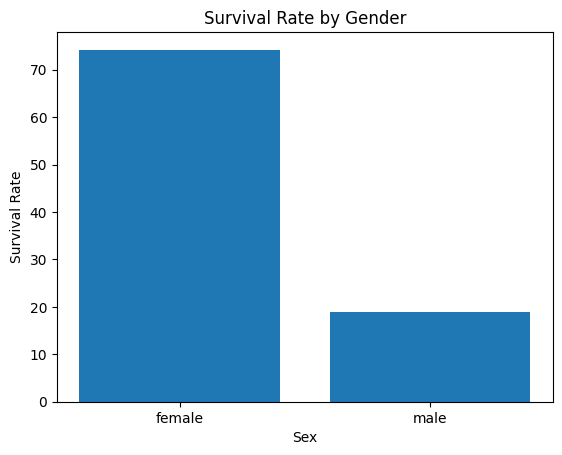

In [17]:
import matplotlib.pyplot as plt
plt.bar(pandas_df["Sex"],pandas_df["Survival_Rate"])
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Gender")
plt.show()

# plt.bar(pandas_df["Age"],pandas_df["Survival_Rate"])
# plt.xlabel("Age")
# plt.ylabel("Survival Rate")
# plt.title("Survival Rate by Age")
# plt.show()
spark.stop()